# Assignment – High Frequency Words
Authors: Naomi Buell and Richie Rivera

*Please answer the following questions in an IPython Notebook, posted to GitHub.*
1. *Choose a corpus of interest.*
2. *How many total unique words are in the corpus? (Please feel free to define unique words in any interesting, defensible way).*
3. *Taking the most common words, how many unique words represent half of the total words in the corpus?*
4. *Identify the 200 highest frequency words in this corpus.*
5. *Create a graph that shows the relative frequency of these 200 words.*
6. *Does the observed relative frequency of these words follow Zipf’s law? Explain.*
7. *In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”*

## 1. Choose a corpus of interest.

We chose the *One Piece Transcripts Dataset (Episodes 382–777)*, which can be found here: https://huggingface.co/datasets/mramazan/One-Piece-Transcripts-with-Character-Names-382-777. This dataset contains all dialogue lines from One Piece episodes 382 to 777.

First, we import libraries and load the dataset from online.

In [24]:
# Import packages
from datasets import load_dataset
import nltk
from nltk import word_tokenize
import pandas as pd
import numpy as np
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# download punkt if it's not found
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    print("Downloading NLTK 'punkt_tab' tokenizer...")
    nltk.download('punkt_tab')

In [25]:
ds = load_dataset("mramazan/One-Piece-Transcripts-with-Character-Names-382-777")

We preview the data below. It has 5 columns: `episode`, `start`, `end`, `character`, and `text`. We will be working with the `text` column, which contains the dialogue lines spoken by characters in the episodes.

In [26]:
# Preview the data
df = ds['train'].to_pandas()
df.head()

,episode,start,end,character,text
0,384,0:02:31.76,0:02:32.73,Narrator,Wealth.
1,384,0:02:32.73,0:02:33.99,Narrator,Fame.
2,384,0:02:33.99,0:02:34.79,Narrator,Power.
3,384,0:02:36.01,0:02:38.75,Narrator,"The man who once owned everything,"
4,384,0:02:38.75,0:02:39.92,Narrator,"The Pirate King,"


We tokenize this `text` column.

In [ ]:
# Combine all text into a single string
combined_text = " ".join(df["text"])
tokens = word_tokenize(combined_text)
print(tokens[:10])

## 2. How many total unique words are in the corpus?

In [ ]:
# Remove punctuation and convert to lowercase
unique_words = sorted(
    set(
        word.lower() for word in tokens
        if word.isalpha()
    )
)
print(f"Preview of first 10 unique words: {unique_words[0:10]} ...")
print(f"Number of unique words: {len(unique_words)}.")

Preview of first 10 unique words: ['a', 'aaaah', 'aaah', 'aah', 'aback', 'abalones', 'abandon', 'abandoned', 'abandoning', 'abandons'] ...
Number of unique words: 12438.


There are **12,438** unique words in the corpus (this does not include punctuation, and counts unique words regardless of punctuation).

## 3. Taking the most common words, how many unique words represent half of the total words in the corpus?

In [ ]:

print(f"The total words in the corpus is: {len(tokens)}, and half of the total words in the corpus is: {len(tokens)/2}.")

# Count frequency of each word in tokens
word_counts = Counter(word.lower() for word in tokens if word.isalpha())

# Define thresholds (number of top words to consider)
thresholds = [183, 184, 185]

for t in thresholds:
    most_common_words = [w for w, _ in word_counts.most_common(t)]
    total_count = sum(word_counts[w] for w in most_common_words)
    print(f"Top {t} words appear {total_count} times in the corpus.")


The total words in the corpus is: 822817, and half of the total words in the corpus is: 411408.5.
Top 183 words appear 410551 times in the corpus.
Top 184 words appear 411044 times in the corpus.
Top 185 words appear 411530 times in the corpus.


**The top 184-185 most common words** represent about half (411,044-411,530 words) of the total words in the corpus (822,817 words). 

## 4. Identify the 200 highest frequency words in this corpus.

We print the 200 highest frequency words below.

In [ ]:
print(most_common_words[0:200])

['the', 'you', 'i', 'to', 'it', 'a', 'that', 'of', 'is', 'and', 'we', 'this', 'what', 'do', 'in', 'are', 'he', 'be', 'me', 'for', 'have', 'on', 'so', 'all', 'they', 'was', 'one', 'there', 'my', 'who', 'just', 'with', 'no', 'but', 'if', 'now', 'luffy', 'here', 'your', 'will', 'get', 'as', 'his', 'up', 'can', 'not', 'pirate', 'like', 'out', 'let', 'right', 'him', 'king', 'na', 'from', 'go', 'us', 'world', 'hey', 'pirates', 'them', 'did', 'straw', 'at', 'gon', 'about', 'how', 'has', 'time', 'man', 'too', 'hat', 'by', 'ca', 'then', 'our', 'even', 'way', 'island', 'really', 'going', 'an', 'got', 'were', 'back', 'been', 'new', 'take', 'why', 'oh', 'know', 'their', 'see', 'well', 'down', 'after', 'crew', 'sea', 'where', 'would', 'gomu', 'want', 'could', 'wo', 'come', 'only', 'yeah', 'ace', 'into', 'still', 'piece', 'please', 'guys', 'fruit', 'over', 'stop', 'wait', 'people', 'sure', 'huh', 'should', 'great', 'away', 'law', 'navy', 'make', 'think', 'must', 'when', 'alright', 'any', 'look', 'sh

## 5. Create a graph that shows the relative frequency of these 200 words.

We create a bar plot of the frequency of the top 200 words below.

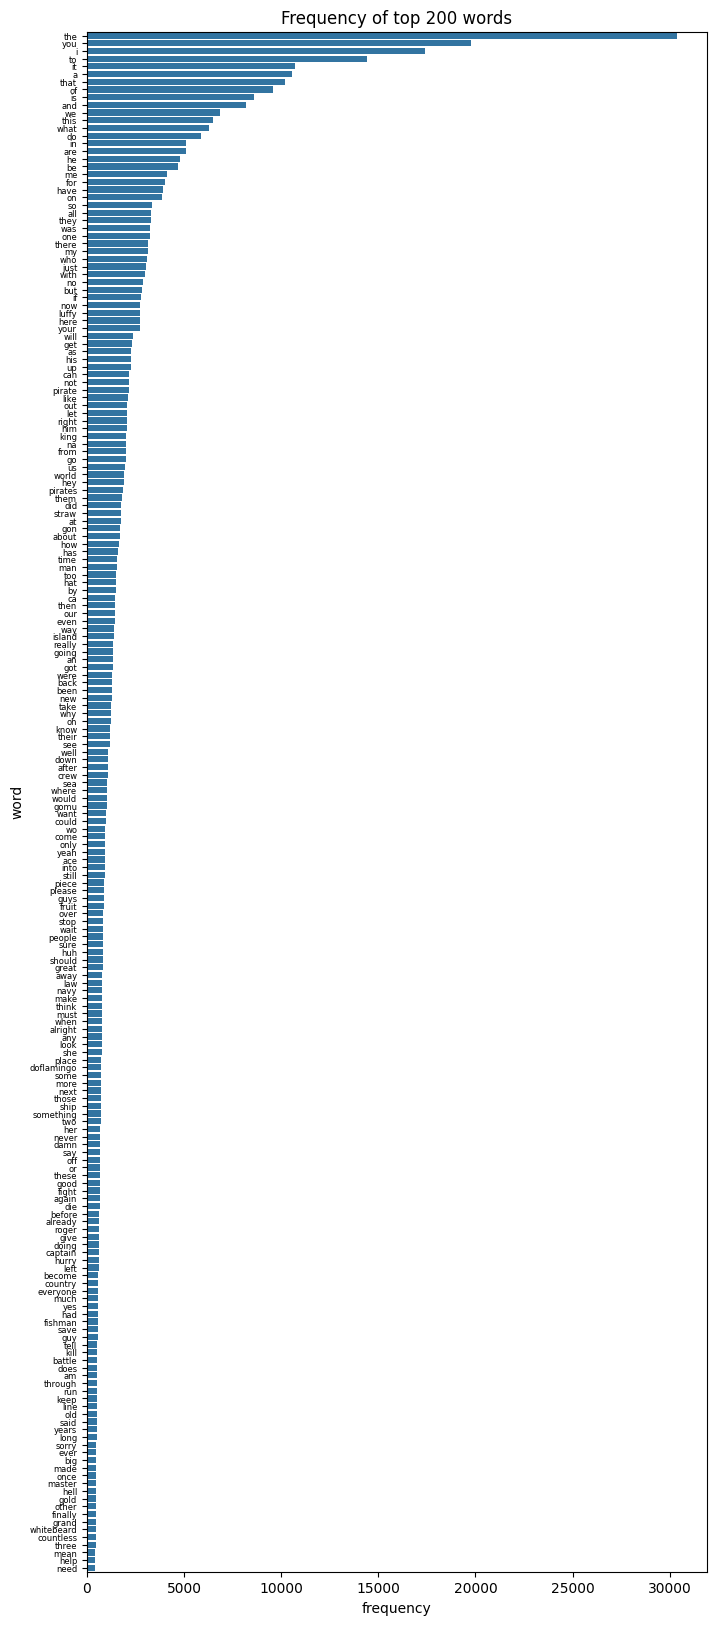

In [ ]:
word_frequency_df = pd.DataFrame(word_counts.most_common(200), columns=['word','frequency'])

plt.figure(figsize=(8, 20))
sns.barplot(
    x='frequency',
    y='word',
    data=word_frequency_df
)
plt.title("Frequency of top 200 words")
plt.tick_params(axis='y', labelsize=6)
plt.show()

The first graph shows the change in frequency between the top 200 words decreases over time. The first word, "the", shows up over 30,000 times while the 10th most common word, "and", only shows up around 8,000 times. The top words appear to be "stop words" such as "the", "a", "to", "of", and "I". We zoom in on the top 35 words below to see the steep drop off and high rate of stop words more clearly.

Text(0.5, 1.0, 'Top 35 words are often stop words and show steep drop off.')

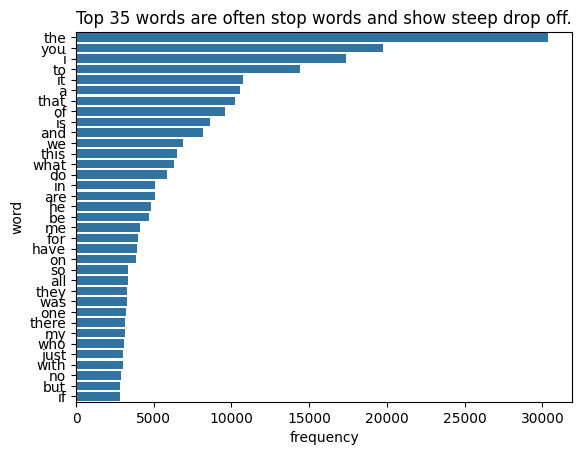

In [ ]:
sns.barplot(
    x='frequency',
    y='word',
    data=word_frequency_df.head(35)
)
plt.title("Top 35 words are often stop words and show steep drop off.")

The y axis of this graph may be better viewed as a log of frequency, which can help to visualize the heavy-tailed distribution of word frequencies more clearly.

Text(0.5, 0, 'log-frequency')

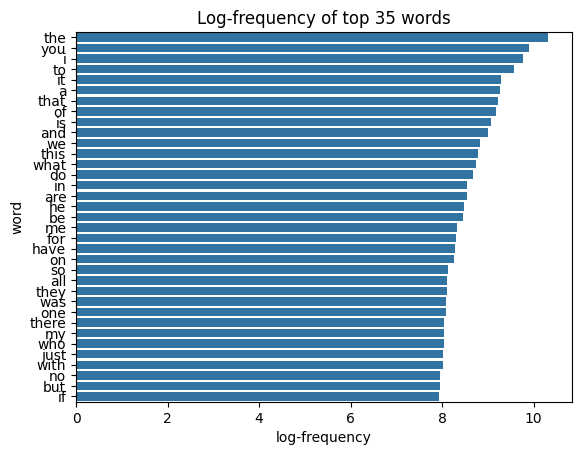

In [ ]:
word_frequency_df['log_frequency'] = np.log(word_frequency_df['frequency'])
sns.barplot(
    x='log_frequency',
    y='word',
    data=word_frequency_df.head(35)
)
plt.title("Log-frequency of top 35 words")
plt.xlabel("log-frequency")

Another way to visualize the relative frequency of the top 200 words is with a word cloud, shown below.

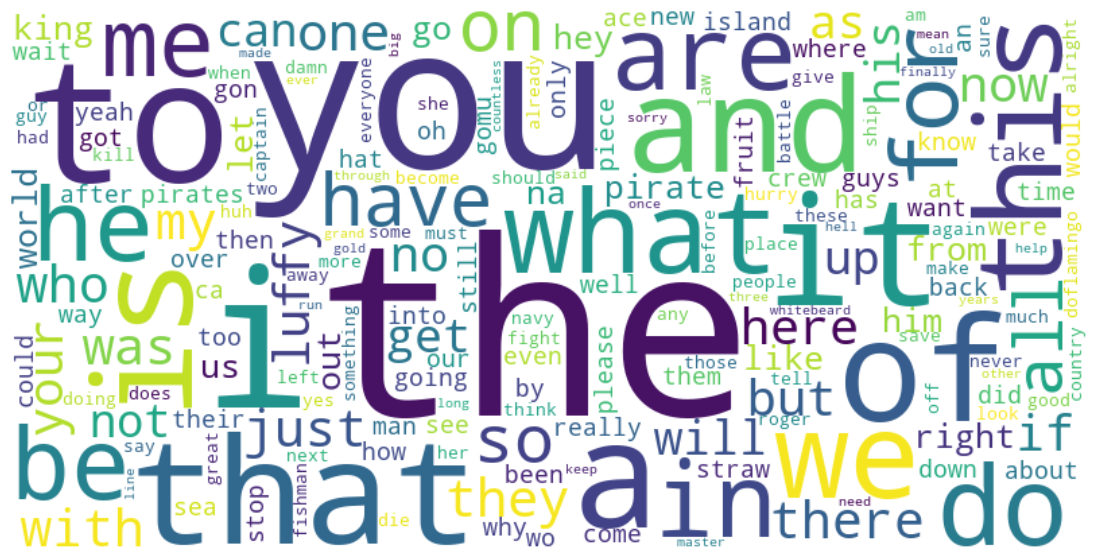

In [ ]:
# Create a dictionary of word frequencies
freq_dict = dict(zip(word_frequency_df['word'], word_frequency_df['frequency']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq_dict)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## 6. Does the observed relative frequency of these words follow Zipf’s law? Explain.

Zipf's law is the idea that the frequency of the most popular word is inversely proportional to it's rank. This would mean that the log of the frequency and the log of the rank of each word should be a linear line.

The R^2 of this line is 0.98


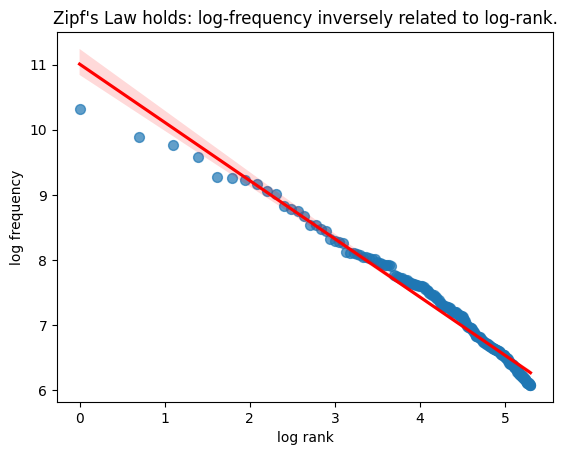

In [ ]:
word_frequency_df['rank'] = word_frequency_df.index + 1
word_frequency_df['log_rank'] = np.log(word_frequency_df['rank'])

sns.regplot(
    x='log_rank',
    y='log_frequency',
    data=word_frequency_df,
    scatter_kws={'alpha': 0.7, 's': 50},
    line_kws={'color': 'red'}
)
plt.ylabel("log frequency")
plt.xlabel("log rank")
plt.title("Zipf's Law holds: log-frequency inversely related to log-rank.")


# Get the slope of the line
slope, intercept = np.polyfit(
    word_frequency_df['log_rank'],
    word_frequency_df['log_frequency'],
    1
)

# Get the r^2 so we can see how linear the line is
y_predicted = slope * word_frequency_df['log_rank'] + intercept
residuals = word_frequency_df['log_frequency'] - y_predicted
ss_res = np.sum(residuals**2)
ss_tot = np.sum((word_frequency_df['log_frequency'] - np.mean(word_frequency_df['log_frequency']))**2)
r_squared = 1 - (ss_res / ss_tot)

print(f"The R^2 of this line is {round(r_squared,2)}")

As we can see from the graph and the R^2 above that this corpus does very closely folow Zipf's law.

## 7. In what ways do you think the frequency of the words in this corpus differ from “all words in all corpora.”

The frequency of the words in this corpus differ from all words in all corpora most obviously due to the translated nature of this text. Our corpus is not originally an english text. Rather, it's a Japanese-to-English translation of an anime adaptation of a manga, giving us two layers of translation between them. This would likely result in some differences from other corpora. In addition, the context of this corpus is very specific to a story of pirate adventure, which makes it so words associated with pirates are more prevalent (e.g., island, pirates, sea, gold, crew, etc.). Additionally, there are proper nouns (such as names or locations) which may not exist in the English dictionary but are used in this corpus.